In [61]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [63]:
#0 type model: Will be able to detect the faces within the range of 2 meters from the camera.
#1 type model: Will be able to detect the faces within the range of 5 meters. Though the default value is 0.
mp_face_detection = mp.solutions.face_detection

face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils

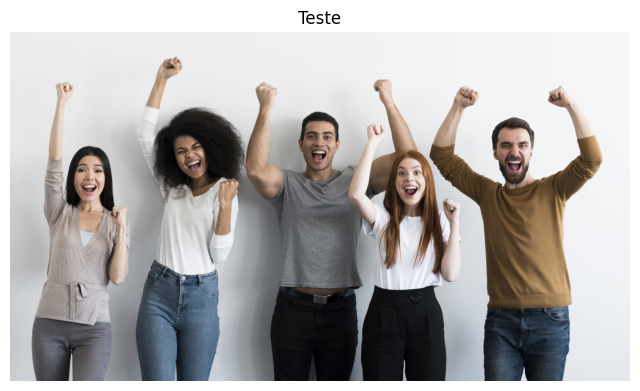

In [68]:
sample_img = cv2.imread('1.jpg')

plt.figure(figsize = [8, 8])

plt.title("Teste");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [65]:
face_detection_results = face_detection.process(sample_img[:,:,::-1])

if face_detection_results.detections:
    
    for face_no, face in enumerate(face_detection_results.detections):
        
        print(f'FACE NUMBER: {face_no+1}')
        print('==============================')
        
        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')
        
        face_data = face.location_data

        print(f'\nFACE BOUNDING BOX:\n{face_data.relative_bounding_box}')
        
        for i in range(2):

            print(f'{mp_face_detection.FaceKeyPoint(i).name}:')
            print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}') 

FACE NUMBER: 1
FACE CONFIDENCE: 0.92

FACE BOUNDING BOX:
xmin: 0.7729364633560181
ymin: 0.2886815071105957
width: 0.0768168568611145
height: 0.13654214143753052

RIGHT_EYE:
x: 0.794091522693634
y: 0.3283688426017761

LEFT_EYE:
x: 0.8229866027832031
y: 0.3354092240333557

FACE NUMBER: 2
FACE CONFIDENCE: 0.91

FACE BOUNDING BOX:
xmin: 0.2538081705570221
ymin: 0.3014886975288391
width: 0.06621921062469482
height: 0.11770951747894287

RIGHT_EYE:
x: 0.2748239040374756
y: 0.34056395292282104

LEFT_EYE:
x: 0.2976371943950653
y: 0.33436107635498047

FACE NUMBER: 3
FACE CONFIDENCE: 0.87

FACE BOUNDING BOX:
xmin: 0.10286778211593628
ymin: 0.3721082806587219
width: 0.05859740078449249
height: 0.10414624214172363

RIGHT_EYE:
x: 0.11793830990791321
y: 0.40590542554855347

LEFT_EYE:
x: 0.14335665106773376
y: 0.40145212411880493

FACE NUMBER: 4
FACE CONFIDENCE: 0.81

FACE BOUNDING BOX:
xmin: 0.4704717695713043
ymin: 0.27198171615600586
width: 0.06429889798164368
height: 0.11429673433303833

RIGHT_EYE

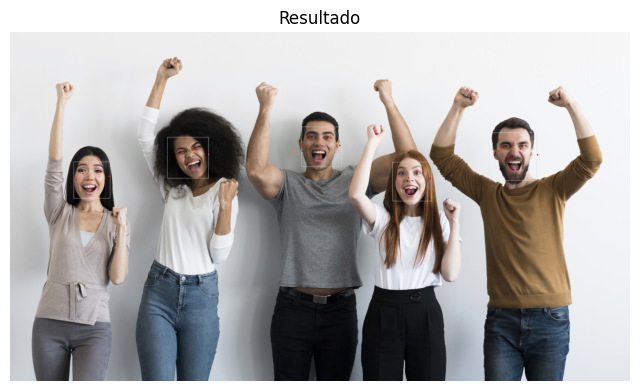

In [67]:
img_copy = sample_img[:,:,::-1].copy()

if face_detection_results.detections:
    
    for face_no, face in enumerate(face_detection_results.detections):

        mp_drawing.draw_detection(image=img_copy, detection=face, 
                                 keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0),
                                                                              thickness=5,
                                                                              circle_radius=5))
fig = plt.figure(figsize = [8, 8])

plt.title("Resultado");plt.axis('off');plt.imshow(img_copy);plt.show()